## Rayron Ferreira

- Dataset de uma instituicao financeira: Salario x Limite de Empréstimo

In [38]:
# importando libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [45]:
# leitura dataset

dataset = pd.read_excel('./base-salarios.xlsx', 'Plan1')

dataset.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [46]:
# conversão para array
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

Text(0, 0.5, 'Limite de Empréstimo')

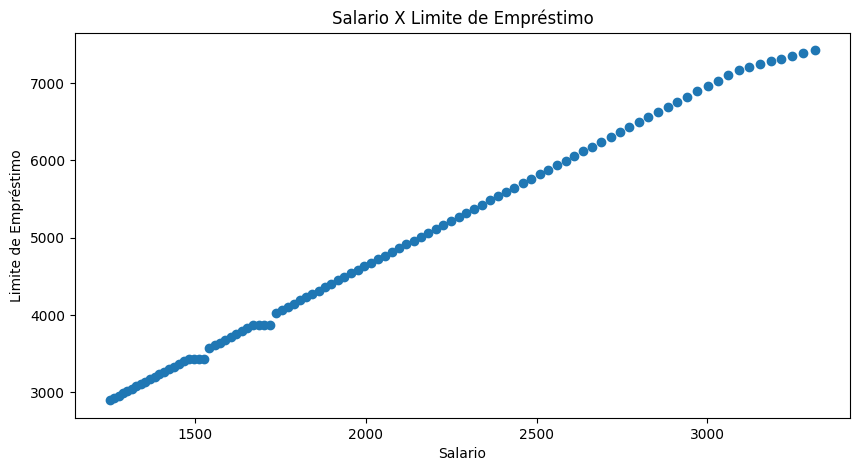

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y);
plt.title("Salario X Limite de Empréstimo")
plt.xlabel('Salario')
plt.ylabel('Limite de Empréstimo')

In [48]:
# calculo correlação
corr = np.corrcoef(X, y)
corr

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

<Axes: >

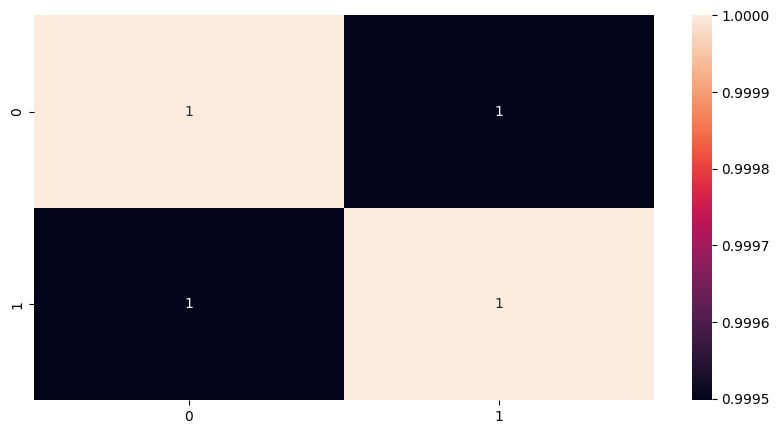

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

In [50]:
# convertendo para matriz para treinar modelo
X = X.reshape(-1,1)
y = y.reshape(-1,1)

X

array([[1250.21913   ],
       [1262.7213213 ],
       [1275.34853451],
       [1288.10201986],
       [1300.98304006],
       [1313.99287046],
       [1327.13279916],
       [1340.40412715],
       [1353.80816843],
       [1367.34625011],
       [1381.01971261],
       [1394.82990974],
       [1408.77820883],
       [1422.86599092],
       [1437.09465083],
       [1451.46559734],
       [1465.98025331],
       [1480.64005585],
       [1495.4464564 ],
       [1510.40092097],
       [1525.50493018],
       [1540.75997948],
       [1556.16757927],
       [1571.72925507],
       [1587.44654762],
       [1603.32101309],
       [1619.35422323],
       [1635.54776546],
       [1651.90324311],
       [1668.42227554],
       [1685.1064983 ],
       [1701.95756328],
       [1718.97713891],
       [1736.1669103 ],
       [1753.52857941],
       [1771.0638652 ],
       [1788.77450385],
       [1806.66224889],
       [1824.72887138],
       [1842.97616009],
       [1861.4059217 ],
       [1880.019

In [51]:
# separando dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  random_state=42,
  test_size=0.20
)

print('Treino: ', len(X_train), 'Teste: ', len(X_test))

Treino:  79 Teste:  20


In [52]:
# treinando modelo

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
#score

regressor.score(X_train, y_train)

0.9990915475310658

In [54]:
y_pred = regressor.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis=1))

[[5357.81802792 5374.54607331]
 [4310.94696194 4317.88992741]
 [7427.5054784  7315.79962101]
 [3469.89471875 3434.63008726]
 [7576.13418408 7387.52314671]
 [6660.87504685 6689.78273641]
 [5464.84601583 5482.57444938]
 [4396.93284143 4404.67951495]
 [3206.91786291 3203.54149363]
 [2906.31046278 2900.124323  ]
 [3944.50091467 3870.22715157]
 [6153.73465918 6177.90211913]
 [4619.53510589 4629.36243768]
 [3754.66097053 3756.40434356]
 [4484.6470371  4493.2135732 ]
 [3022.97666348 3017.88100001]
 [3609.44470022 3609.83074009]
 [3270.71275751 3267.93267765]
 [6929.99162547 6961.41474154]
 [5973.72600848 5996.21093168]]


In [55]:
# avaliando desempenho
# r square

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE: ', rmse) #o quanto o modelo esta errando
print('R^2: ', r2)

RMSE:  54.168287085041115
R^2:  0.9986294037640446


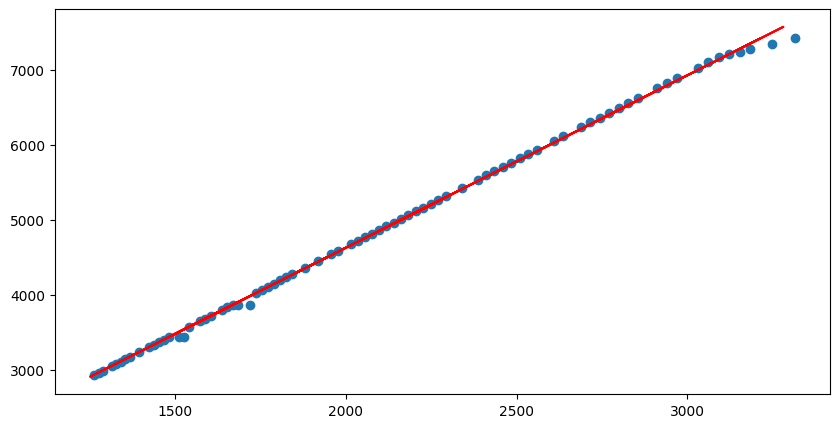

In [41]:
# visualizando regressão linear

plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train)

plt.plot(X_test, y_pred, color='red')

In [63]:
salario = 5600
prevision = regressor.predict([[salario]])

print('Salario: ', salario, )
print('Limite empréstimo: ', prevision[0][0])

Salario:  5600
Limite empréstimo:  12903.026779938336
